<center><h1>Network Attacks<center>

### The content will be as follows

1. [EDA](#chapter1)
2. [Data Processing](#chapter2)
3. [Model training](#chapter3)


### IMPORTING NECESSARY PACKAGES

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting
import seaborn as sns #Visualisation
import warnings
warnings.filterwarnings("ignore") # ignore warnings
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## EDA<a class="anchor" id="chapter1"></a>

In [2]:
# Columns creation and reading of dataset
columns = ["duration", "protocoltype", "service", "flag", "srcbytes", "dstbytes", "land", "wrongfragment",
           "urgent", "hot", "numfailedlogins", "loggedin", "numcompromised", "rootshell", "suattempted",
           "numroot", "numfilecreations", "numshells", "numaccessfiles", "numoutboundcmds", "ishostlogin",
           "isguestlogin", "count", "srvcount", "serrorrate", "srvserrorrate", "rerrorrate", "srvrerrorrate",
           "samesrvrate", "diffsrvrate", "srvdiffhostrate", "dsthostcount", "dsthostsrvcount",
           "dsthostsamesrvrate", "dsthostdiffsrvrate", "dsthostsamesrcportrate", "dsthostsrvdiffhostrate",
           "dsthostserrorrate", "dsthostsrvserrorrate", "dsthostrerrorrate", "dsthostsrvrerror_rate", "labels"]

data = pd.read_csv("kddcup.data_10_percent", names=columns) # Reading CSV file with Header
data.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerror_rate,labels
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [3]:
# Data set size
data = data.sample(n = 200000)
data.reset_index(inplace=True)
data.shape

(200000, 43)

In [4]:
# Checking whether the dataset is having null values
[col for col in data.columns if data[col].isnull().sum() > 0]

[]

In [5]:
data.describe() # Statistical information of the dataset

,index,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,...,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerror_rate
count,200000.000000,200000.000000,2.000000e+05,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,246851.578525,47.635025,5.223014e+03,8.484594e+02,0.000040,0.006075,0.000015,0.036790,0.000105,0.149675,...,232.359160,188.530065,0.753206,0.031132,0.600785,0.006715,0.176866,0.176633,0.058460,0.057674
std,142648.262260,697.518592,1.551722e+06,3.261604e+04,0.006324,0.130684,0.005000,0.817863,0.012845,0.356753,...,64.870862,106.084232,0.410957,0.109984,0.481542,0.042345,0.380689,0.381091,0.231177,0.230638
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,123154.500000,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,44.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,246914.000000,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,370257.500000,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,494015.000000,40806.000000,6.933756e+08,5.153460e+06,1.000000,3.000000,2.000000,30.000000,4.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 0, 'Attacks')

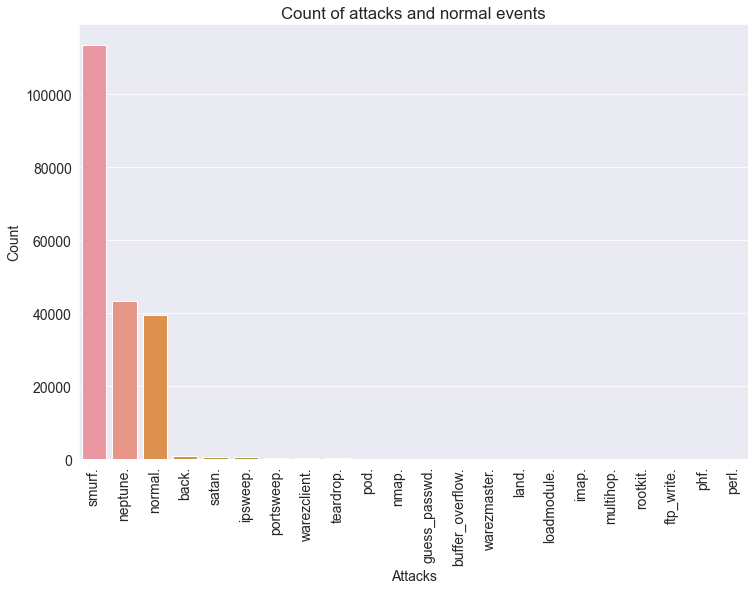

In [6]:
# Analysis of the attack lables
grouped_labels = data.groupby("labels")["labels"].count().sort_values(ascending=False)

plt.rcParams["figure.figsize"] = (12,8)
font = {"size"   : 14}
plt.rc('font', **font)
sns.set_style("darkgrid")
plt.xticks(rotation=90)
sns.barplot(x=grouped_labels.index, y=grouped_labels.values)
plt.title("Count of attacks and normal events")
plt.ylabel("Count")
plt.xlabel("Attacks")

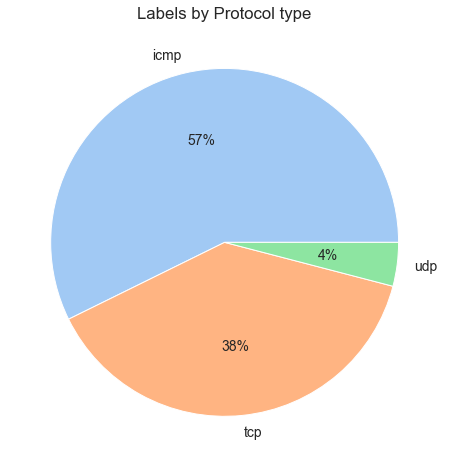

In [7]:
#Analysis on the protocol types
grouped_labels = data.groupby("protocoltype")["protocoltype"].count().sort_values(ascending=False)
#define data
data_new =grouped_labels.values
labels = grouped_labels.index
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
#create pie chart
plt.pie(data_new, labels = labels, colors = colors, autopct='%d%%')
plt.title("Labels by Protocol type")
plt.show()

In [8]:
# Function to remove dots from attack names
def remove_dot(label):
    """ Remove dot from labels """
    return label.replace(".", "")
data["labels"] = data["labels"].apply(lambda label: remove_dot(label))
print(pd.unique(data["labels"]))

['smurf' 'neptune' 'normal' 'warezclient' 'portsweep' 'back' 'satan' 'pod'
 'ipsweep' 'nmap' 'ftp_write' 'teardrop' 'guess_passwd' 'multihop'
 'warezmaster' 'loadmodule' 'buffer_overflow' 'rootkit' 'imap' 'phf'
 'land' 'perl']


In [9]:
# Grouping attack labels based on the type of attack
attack_families = {
    "back": "dos",
    "buffer_overflow": "u2r",
    "ftp_write": "r2l",
    "guess_passwd": "r2l",
    "imap": "r2l",
    "ipsweep": "probe",
    "land": "dos",
    "loadmodule": "u2r",
    "multihop": "r2l",
    "neptune": "dos",
    "nmap": "probe",
    "perl": "u2r",
    "phf": "r2l",
    "pod": "dos",
    "portsweep": "probe",
    "rootkit": "u2r",
    "satan": "probe",
    "smurf": "dos",
    "spy": "r2l",
    "teardrop": "dos",
    "warezclient": "r2l",
    "warezmaster": "r2l",
    "normal": "normal",
}

# Function to map attack labels to its family
def map_attacks_to_families(attack):
    """ Map attack to it's family """
    return attack_families[attack]

data["labels"] = data["labels"].apply(lambda attack: map_attacks_to_families(attack))
print(pd.unique(data["labels"]))

['dos' 'normal' 'r2l' 'probe' 'u2r']


Text(0.5, 1.0, 'Class balance')

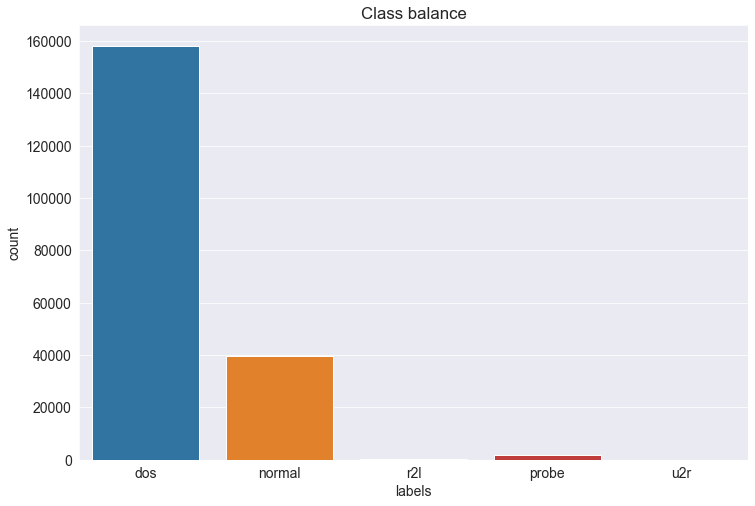

In [10]:
#Analysis of the transformed attack labels
sns.countplot(x="labels", data=data)
plt.title("Class balance")

Text(0.5, 1.0, 'Number of maliscious events within the different protocols')

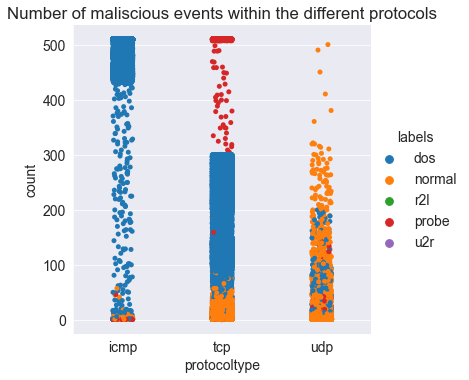

In [11]:
#Analysis of the attacks on protocols
sns.catplot(x="protocoltype", y="count", hue="labels", data=data)
plt.title("Number of maliscious events within the different protocols")

Text(0.5, 1.0, 'Number of failed logins within the different protocols for each attacks')

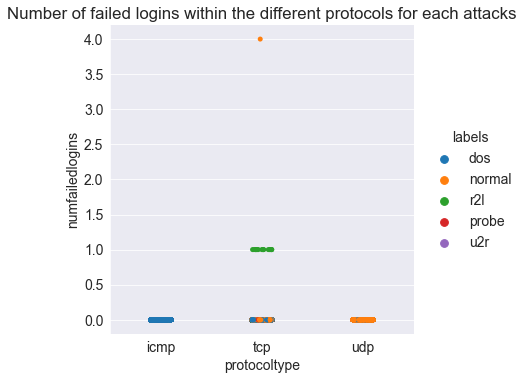

In [12]:
#Analysis of number of failed logins with respect to protocols
sns.catplot(x="protocoltype", y="numfailedlogins", hue="labels", data=data)
plt.title("Number of failed logins within the different protocols for each attacks")

In [13]:
cols = ['duration', 'srcbytes','dstbytes', 'numroot','numshells','numaccessfiles','protocoltype','labels']
data1 = data[cols]
data1["protocoltype"] = data1["protocoltype"].astype('category')
data1["protocoltype"] = data1["protocoltype"].cat.codes
data1["labels"] = data1["labels"].astype('category')
data1["labels"] = data1["labels"].cat.codes
data1.head()

,duration,srcbytes,dstbytes,numroot,numshells,numaccessfiles,protocoltype,labels
0,0,1032,0,0,0,0,0,0
1,0,520,0,0,0,0,0,0
2,0,520,0,0,0,0,0,0
3,0,1032,0,0,0,0,0,0
4,0,1032,0,0,0,0,0,0


In [14]:
data1.corr()

,duration,srcbytes,dstbytes,numroot,numshells,numaccessfiles,protocoltype,labels
duration,1.000000,0.003171,0.008914,0.067436,0.000300,0.036091,0.164035,0.138577
srcbytes,0.003171,1.000000,-0.000028,-0.000014,-0.000011,-0.000063,0.002526,0.011679
dstbytes,0.008914,-0.000028,1.000000,0.029440,0.000485,0.013369,0.024278,0.065011
numroot,0.067436,-0.000014,0.029440,1.000000,0.026375,0.486408,0.005270,0.010868
numshells,0.000300,-0.000011,0.000485,0.026375,1.000000,0.024780,0.007949,0.030470
numaccessfiles,0.036091,-0.000063,0.013369,0.486408,0.024780,1.000000,0.024413,0.049797
protocoltype,0.164035,0.002526,0.024278,0.005270,0.007949,0.024413,1.000000,0.575169
labels,0.138577,0.011679,0.065011,0.010868,0.030470,0.049797,0.575169,1.000000


<AxesSubplot:>

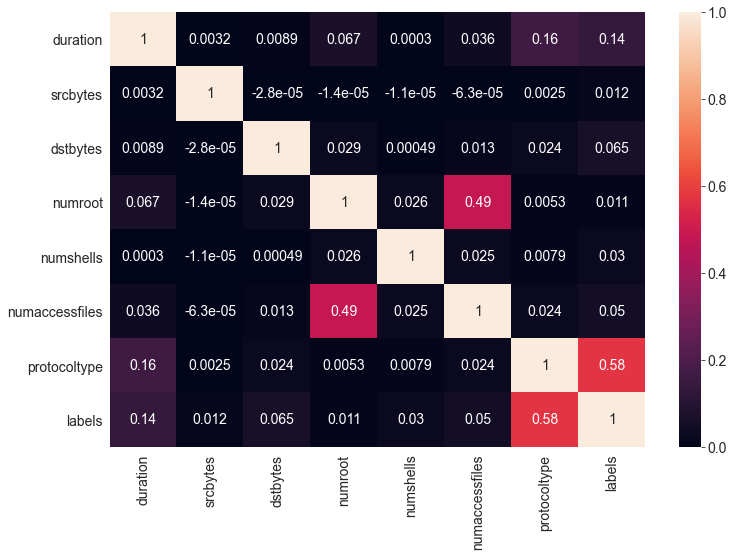

In [15]:
sns.heatmap(data1.corr(), annot=True)

### Data Processing<a class="anchor" id="chapter2"></a>

In [16]:
# Creating feature vector and target vector.
X = data1.drop("labels", axis=1)
y = data1["labels"]


# Constant features 
[col for col in X.columns if X[col].nunique() == 1]

[]

In [18]:
# Encode categorical columns and split data.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Encoding target variable
lr = LabelEncoder()
y = lr.fit_transform(y)


# # Encoding predictors
# enc_protocol = pd.get_dummies(data1["protocoltype"], prefix="protocol_")
# # enc_service = pd.get_dummies(data["service"], prefix="service_")
# # enc_flag = pd.get_dummies(data["flag"], prefix="flag_")

# # X = pd.concat([X, enc_protocol, enc_service, enc_flag], axis=1)
# X = pd.concat([X, enc_protocol], axis=1)
# X.drop("protocoltype", axis=1, inplace=True)
# # X.drop("service", axis=1, inplace=True)
# # X.drop("flag", axis=1, inplace=True)


# Splitting data into train and test...since our data is implaced we stratify it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)

<AxesSubplot:>

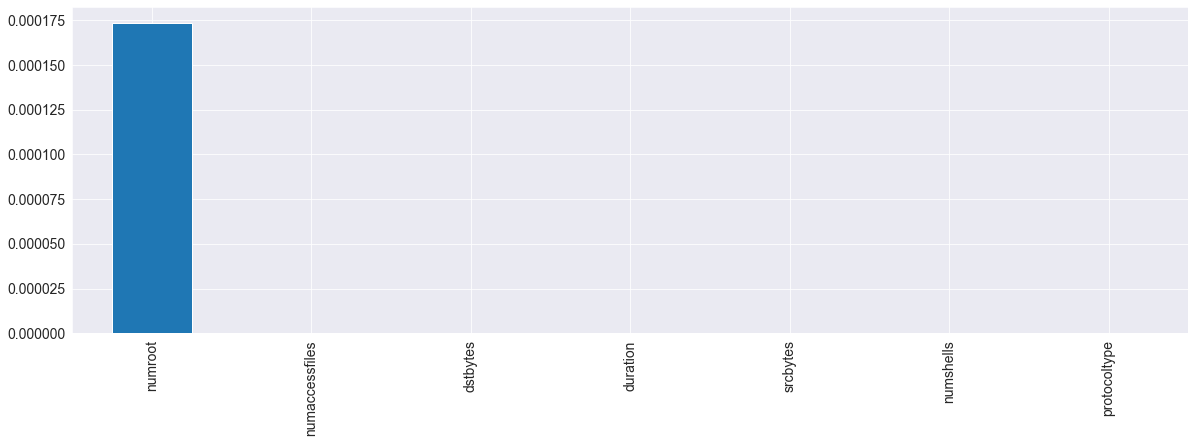

In [19]:
# Anova test for feature importance
from sklearn.feature_selection import f_classif
anova_f_classif = f_classif(X_train, y_train)
anova_f_classif = pd.Series(anova_f_classif[1])
anova_f_classif.index = X_train.columns
anova_f_classif.sort_values(ascending=False).plot.bar(figsize=(20, 6))

### Model training<a class="anchor" id="chapter3"></a>

In [44]:

# define scoring method
scoring = 'accuracy'
# Define models to train
names = ["KNN","Random Forest","Decision Tree","Kmeans","Naive Bayes"]


# Train the model using the training sets
classifiers = [
     KNeighborsClassifier(n_neighbors=7),
     RandomForestClassifier(max_depth=1000, n_estimators=50,random_state=43),
     DecisionTreeClassifier(criterion="entropy", max_depth=3),
     KMeans(n_clusters=5),
     GaussianNB()
]
#purpose of zip() is to map the similar index of multiple containers so that they can be used just using as single entity.
models = zip(names, classifiers)
acc_score=[]
Accuracy = []
precision = []
recall = []
F1score = []
Reportlist = []
confusion_mat = []
for name, classifier in models:
    #fit function in ML, is used for training of model using data examples.
    #Fit function adjusts weights according to data values so that better accuracy can be achieved.
    classifier.fit(X_train, y_train)
    #predict() function enables us to predict the labels of the data values on the basis of the trained model.
    predicted = classifier.predict(X_test)
    print(name)
    # examining the output 
    Report = classification_report(y_test, predicted, output_dict=True)
#     skplt.metrics.plot_confusion_matrix(y_test,predicted)
    Report_ = classification_report(y_test, predicted)
    Reportlist.append(Report_)
    confusion_mat.append((y_test,predicted))
    acc_score.append(accuracy_score(y_test, predicted))
    print("Accuracy Score:\n",accuracy_score(y_test, predicted)) #tp+tn/tp+tn+fp+fn
    Accuracy.append(Report['accuracy'])
    precision.append(Report['macro avg']['precision']) 
    recall.append(Report['macro avg']['recall'])
    F1score.append(Report['macro avg']['f1-score'])
#     print("Classification report:\n",Report_) #The classification report visualizer displays the precision, recall, F1, and support scores for the model. 
#     print("Confusion Matrix:\n",confusion_matrix(y_test,predicted)) #assess the performance of the classifier (dim=true class x prediction class)
    print()

KNN
Accuracy Score:
 0.9831833333333333

Random Forest
Accuracy Score:
 0.9836333333333334

Decision Tree
Accuracy Score:
 0.9775833333333334

Kmeans
Accuracy Score:
 0.7913166666666667

Naive Bayes
Accuracy Score:
 0.8240333333333333



### KNN Report

In [41]:
print("Accuracy Score:\n",Accuracy[0])
print("Classification report:\n",Reportlist[0])

Accuracy Score:
 0.9831833333333333
Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     47478
           1       1.00      0.95      0.97     11859
           2       0.98      0.36      0.52       512
           3       0.98      0.90      0.93       144
           4       0.00      0.00      0.00         7

    accuracy                           0.98     60000
   macro avg       0.79      0.64      0.68     60000
weighted avg       0.98      0.98      0.98     60000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

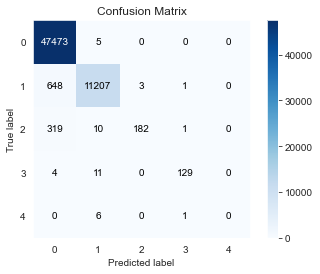

In [48]:
%matplotlib inline
skplt.metrics.plot_confusion_matrix(confusion_mat[0][0],confusion_mat[0][1])

### Random Forest

In [50]:
print("Accuracy Score:\n",Accuracy[1])
print("Classification report:\n",Reportlist[1])

Accuracy Score:
 0.9836333333333334
Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     47478
           1       1.00      0.95      0.97     11859
           2       0.99      0.37      0.54       512
           3       1.00      0.95      0.98       144
           4       0.80      0.57      0.67         7

    accuracy                           0.98     60000
   macro avg       0.95      0.77      0.83     60000
weighted avg       0.98      0.98      0.98     60000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

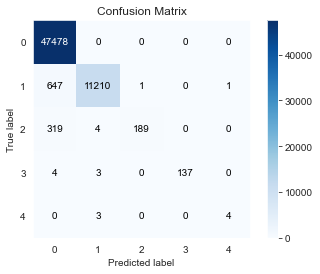

In [51]:
%matplotlib inline
skplt.metrics.plot_confusion_matrix(confusion_mat[1][0],confusion_mat[1][1])

### Decision Tree

In [52]:
print("Accuracy Score:\n",Accuracy[2])
print("Classification report:\n",Reportlist[2])

Accuracy Score:
 0.9775833333333334
Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     47478
           1       0.99      0.93      0.96     11859
           2       0.47      0.27      0.34       512
           3       0.00      0.00      0.00       144
           4       0.00      0.00      0.00         7

    accuracy                           0.98     60000
   macro avg       0.49      0.44      0.46     60000
weighted avg       0.97      0.98      0.98     60000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

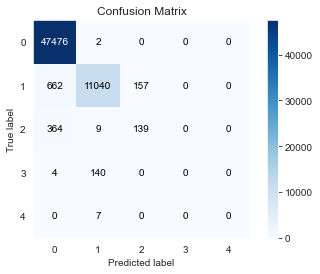

In [54]:
%matplotlib inline
skplt.metrics.plot_confusion_matrix(confusion_mat[2][0],confusion_mat[2][1])

### Kmeans

In [55]:
print("Accuracy Score:\n",Accuracy[3])
print("Classification report:\n",Reportlist[3])

Accuracy Score:
 0.7913166666666667
Classification report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88     47478
           1       0.00      0.00      0.00     11859
           2       0.00      0.00      0.00       512
           3       0.17      0.01      0.01       144
           4       0.00      0.00      0.00         7

    accuracy                           0.79     60000
   macro avg       0.19      0.20      0.18     60000
weighted avg       0.63      0.79      0.70     60000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

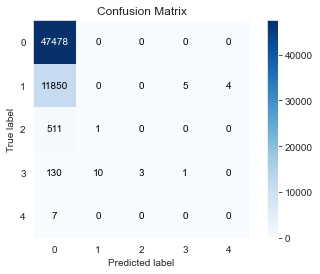

In [56]:
%matplotlib inline
skplt.metrics.plot_confusion_matrix(confusion_mat[3][0],confusion_mat[3][1])

### Naive Bayes

In [57]:
print("Accuracy Score:\n",Accuracy[4])
print("Classification report:\n",Reportlist[4])

Accuracy Score:
 0.8240333333333333
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90     47478
           1       0.89      0.18      0.31     11859
           2       0.81      0.03      0.05       512
           3       0.13      0.12      0.13       144
           4       0.00      0.14      0.00         7

    accuracy                           0.82     60000
   macro avg       0.53      0.29      0.28     60000
weighted avg       0.84      0.82      0.78     60000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

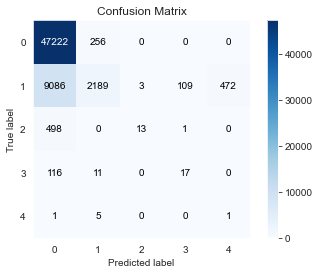

In [58]:
%matplotlib inline
skplt.metrics.plot_confusion_matrix(confusion_mat[4][0],confusion_mat[4][1])

### Comparison of Algorithms

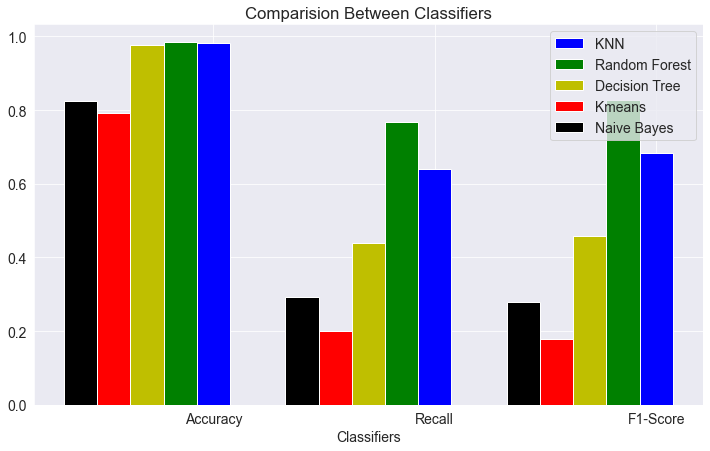

<Figure size 864x864 with 0 Axes>

In [31]:
a=np.arange(3)
w = 0.15
fig,ax=plt.subplots(figsize=(12,7),edgecolor='k')

p1=ax.bar(a,[Accuracy[0],recall[0],F1score[0],],w,color='b')
p2=ax.bar(a-w,[Accuracy[1],recall[1],F1score[1]],w,color='g')
p3=ax.bar(a-2*w,[Accuracy[2],recall[2],F1score[2]],w,color='y')
p4=ax.bar(a-3*w,[Accuracy[3],recall[3],F1score[3]],w,color='r')
p5=ax.bar(a-4*w,[Accuracy[4],recall[4],F1score[4]],w,color='k')

ax.set_xticks(a)
ax.set_xticklabels(('Accuracy','Recall','F1-Score'))
ax.set_title('Comparision Between Classifiers')

ax.legend((p1[0],p2[0],p3[0],p4[0],p5[0]),("KNN","Random Forest","Decision Tree","Kmeans","Naive Bayes"))
plt.xlabel('Classifiers')
plt.figure(figsize=(12,12))
plt.show()